In [1]:
# 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [2]:
# (1) 데이터 가져오기

In [3]:
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [63]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [64]:
# (2) 모델에 입력할 데이터 X 준비하기

In [65]:
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [66]:
import numpy as np

X = np.array(df_X)
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [67]:
# (3) 모델에 예측할 데이터 y 준비하기

In [68]:
y = np.array(df_y)
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [69]:
# (4) train 데이터와 test 데이터로 분리하기

In [70]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [72]:
# (5) 모델 준비하기

In [73]:
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
# 모델 함수를 구현해주세요.

In [74]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [75]:
W

array([0.74962778, 0.7505978 , 0.56103922, 0.38434043, 0.45108091,
       0.01628237, 0.6898813 , 0.30870136, 0.39484505, 0.61262799])

In [76]:
W.shape

(10,)

In [77]:
b

0.19445791031083115

In [78]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [79]:
# (6) 손실함수 loss 정의하기

In [80]:
# 손실함수를 MSE 함수로 정의해주세요.

In [81]:
def MSE(a, b):
    mse = ((a - b)**2).mean()
    return mse

In [82]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [83]:
# (7) 기울기를 구하는 gradient 함수 구현하기

In [84]:
# 기울기를 계산하는 gradient 함수를 구현해주세요.

In [85]:
def gradient(X, W, b, y):
    N = len(y)               # N은 데이터 포인트의 개수
    y_pred = model(X, W, b)  # y_pred 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y)  # 공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [86]:
# (8) 하이퍼 파라미터인 학습률 설정하기

In [87]:
# 학습률, learning rate 를 설정해주세요.
# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [88]:
LEARNING_RATE = 0.1

In [89]:
# (9) 모델 학습하기

In [90]:
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
# loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [91]:
losses = []

for i in range(1, 8000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i%100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5380.3357
Iteration 200 : Loss 4877.6618
Iteration 300 : Loss 4503.9083
Iteration 400 : Loss 4222.3184
Iteration 500 : Loss 4007.0341
Iteration 600 : Loss 3839.8200
Iteration 700 : Loss 3707.7768
Iteration 800 : Loss 3601.7450
Iteration 900 : Loss 3515.1892
Iteration 1000 : Loss 3443.4191
Iteration 1100 : Loss 3383.0449
Iteration 1200 : Loss 3331.5952
Iteration 1300 : Loss 3287.2506
Iteration 1400 : Loss 3248.6555
Iteration 1500 : Loss 3214.7869
Iteration 1600 : Loss 3184.8615
Iteration 1700 : Loss 3158.2700
Iteration 1800 : Loss 3134.5312
Iteration 1900 : Loss 3113.2583
Iteration 2000 : Loss 3094.1359
Iteration 2100 : Loss 3076.9029
Iteration 2200 : Loss 3061.3399
Iteration 2300 : Loss 3047.2604
Iteration 2400 : Loss 3034.5043
Iteration 2500 : Loss 3022.9325
Iteration 2600 : Loss 3012.4238
Iteration 2700 : Loss 3002.8712
Iteration 2800 : Loss 2994.1803
Iteration 2900 : Loss 2986.2670
Iteration 3000 : Loss 2979.0566
Iteration 3100 : Loss 2972.4821
Iteration 3200 : 

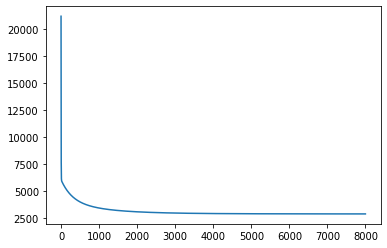

In [92]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [93]:
W, b

(array([  39.50055384, -230.89048113,  542.55433385,  337.71588693,
         -89.96428596, -128.9096932 , -217.79375103,  146.79736555,
         402.24448137,   83.05902771]),
 151.3113538064084)

In [94]:
# (10) test 데이터에 대한 성능 확인하기

In [95]:
# test 데이터에 대한 성능을 확인해주세요.

In [96]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2876.5986311081947

In [97]:
# (11) 정답 데이터와 예측한 데이터 시각화하기

In [98]:
# x축에는 X 데이터의 첫 번째 컬럼을,
# y축에는 정답인 target 데이터를 넣어서
# 모델이 예측한 데이터를 시각화해 주세요.

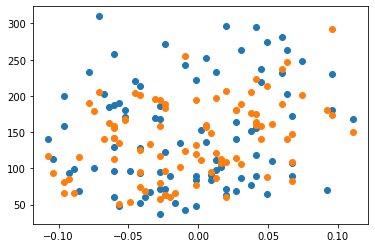

In [99]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()